<font size="5"><b>Case Study II</b><br><br>
Module 6: Introduction to Machine
Learning with Python
 </font>

<font color='red'>

Questions:<br><br>
1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content
across different cereals.<br>
[Hint: Extract values of a specific column using their labels and use hist method of
pyplot]<br><br>
2.The names of the manufactures are coded using alphabets, create a new column
with their full name using the below mapping.<br>
'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'<br>
Create a bar plot where each manufacturer is on the y axis and the height of the bars<br>
depict the number of cereals manufactured by them.<br>
[Hint: Try using countplot this time or bar method of pyplot]<br><br>

3.Extract the rating as your target variable ‘y’ and all numerical parameters as your
predictors ‘x’. Separate 25% of your data as test set.<br><br>
4.Fit a linear regression module and measure the mean squared error on test
dataset.
[ Hint: Explore linear models and metrics section of sklearn documentation]

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sn
from sklearn import metrics



In [122]:

data = pd.read_csv('cereal.csv',header=0)

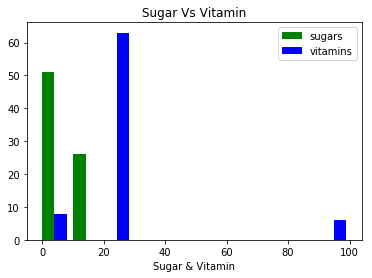

In [123]:
dt = data['name']
ds = data['sugars']
dv = data['vitamins']
plt.hist([ds,dv],color=[ 'green','blue'])
plt.title('Sugar Vs Vitamin')
plt.xlabel('Sugar & Vitamin')
plt.legend(['sugars','vitamins'])
plt.show()

In [124]:
Manufacture_name = data['mfr'].map({'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs','R': 'Raslston Purina','G': 'General Mills','P' :'Post','A':'American Home Foods Products'})

In [125]:
data['Manufacture_name']=Manufacture_name

In [126]:
#data.iloc[:,[Manufacture_name]]

manufa= data.groupby('Manufacture_name').size().reset_index(name='counts')
y=manufa['Manufacture_name']
x=manufa['counts']

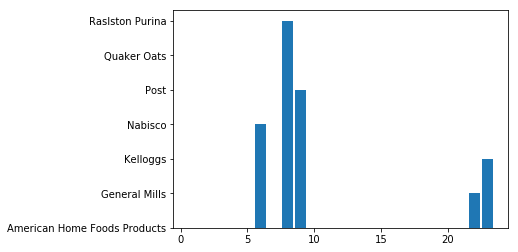

In [127]:
plt.bar(x,y)
plt.show()

In [128]:
data.drop('Manufacture_name',axis=1,inplace=True)
data.drop('name',axis=1,inplace=True)
data.drop('mfr',axis=1,inplace=True)
data.drop('type',axis=1,inplace=True)

In [129]:
x = data.iloc[:,0:12]
y = data['rating']


In [130]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=.25,random_state=2)

In [131]:
ln = LinearRegression()
ln.fit(x_train,y_train)
y_pred= ln.predict(x_test)


In [132]:
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

0.0005277636379506355
